<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/407_Trapping_Rain_Water_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 407. Trapping Rain Water II

Example 1:

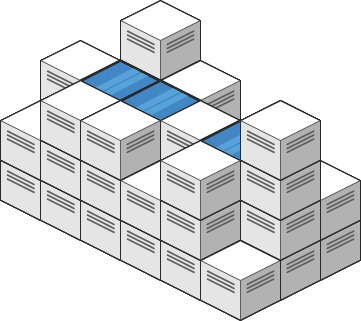

Input: heightMap = [[1,4,3,1,3,2],[3,2,1,3,2,4],[2,3,3,2,3,1]]
Output: 4
Explanation: After the rain, water is trapped between the blocks.
We have two small ponds 1 and 3 units trapped.
The total volume of water trapped is 4.
Example 2:

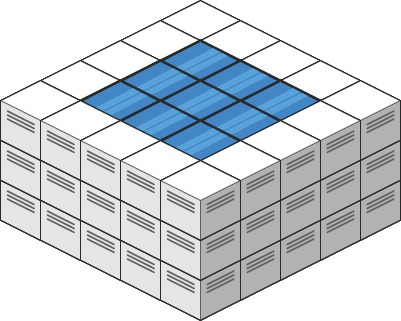

Input: heightMap = [[3,3,3,3,3],[3,2,2,2,3],[3,2,1,2,3],[3,2,2,2,3],[3,3,3,3,3]]
Output: 10


Constraints:

m == heightMap.length
n == heightMap[i].length
1 <= m, n <= 200
0 <= heightMap[i][j] <= 2 * 104

## Solution: BFS

### Aim: to visit each cell with heights in increasing order, and find neighboring cells lower than that level, so that water can be trapped upto that level. Start by visiting the bordering cells

In [40]:
import heapq
from typing import List

In [41]:
class Solution:
    def trapRainWater(self, heightMap: List[List[int]]) -> int:
        rows,cols=len(heightMap),len(heightMap[0])
        pq=[] #a priority queue having (height, row, column), auto sorted by height in increasing order
        dir=[(0,1),(0,-1),(1,0),(-1,0)] # North South East West: To explore all directions around a cell
        visited=[[False]*cols for _ in range(rows)] #to track the cells visited
        unvisited=rows*cols #to track the no. of cells not visited
        for r in range(rows):
            for c in range(cols):
                if r in [0,rows-1] or c in [0,cols-1]: # Water cannot be stored in bordering cells, so no need to explore them
                    visited[r][c]=True
                    heapq.heappush(pq,(heightMap[r][c],r,c)) # From the bordering cells, we want to explore the neighboring inner cells
                    unvisited-=1

        trapped_water=0 #The final result
        maxlevel=0 # Current waterline (tallest boundary seen so far)
        #Aim: to visit each cell with heights in increasing order, and find neighboring cells lower than that level, so that water can be trapped upto that level. Start by visiting the bordering cells

        while pq and unvisited>0: # Process cells in order of increasing boundary height
            h,r,c=heapq.heappop(pq) #Pops the cell with min height

            # Update waterline
            maxlevel=max(maxlevel,h) #Stores the max level, only updates when a cell height is more than the previous max height encountered


            #Explore all directions
            for d in dir:
                next_r=r+d[0]
                next_c=c+d[1]

                #Check valid cell
                if (0<=next_r<rows and 0<=next_c<cols) and visited[next_r][next_c]==False:

                    if maxlevel>heightMap[next_r][next_c]: # Can be stored here
                        trapped_water+= maxlevel - heightMap[next_r][next_c]


                    heapq.heappush(pq,(heightMap[next_r][next_c],next_r,next_c)) # Explore connected cells inside, store them in the queue. Low levels will be explored first
                    visited[next_r][next_c]=True
                    unvisited-=1
        return trapped_water

sol=Solution()
sol.trapRainWater(heightMap = [[1,4,3,1,3,2],[3,2,1,3,2,4],[2,3,3,2,3,1]])

4

Solution with each step printed

In [42]:
heightMap = [[2,3,3,3,2],[3,3,1,1,2],[4,5,5,5,6]]
rows,cols=len(heightMap),len(heightMap[0])
pq=[] #a priority queue having (height, row, column), auto sorted by height in increasing order
dir=[(0,1),(0,-1),(1,0),(-1,0)] # North South East West: To explore all directions around a cell
visited=[[False]*cols for _ in range(rows)] #to track the cells visited
unvisited=rows*cols #to track the no. of cells not visited
for r in range(rows):
    for c in range(cols):
        if r in [0,rows-1] or c in [0,cols-1]: # Water cannot be stored in bordering cells, so no need to explore them
            visited[r][c]=True
            heapq.heappush(pq,(heightMap[r][c],r,c)) # From the bordering cells, we want to explore the neighboring inner cells
            unvisited-=1

trapped_water=0 #The final result
maxlevel=0 # the max level upto where water can be stored next to that cell
#Aim: to visit each cell with heights in increasing order, and find neighboring cells lower than that level, so that water can be trapped upto that level. Start by visiting the bordering cells

while pq and unvisited>0:
    h,r,c=heapq.heappop(pq) #Pops the cell with min height
    print('Pop',h,r,c) #Check
    maxlevel=max(maxlevel,h) #Stores the max level, only updates when a cell height is more than the previous max height encountered
    print('Max_Level',maxlevel) #Check

    #Explore all directions
    for d in dir:
        next_r=r+d[0]
        next_c=c+d[1]

        #Check valid cell
        if (0<=next_r<rows and 0<=next_c<cols) and visited[next_r][next_c]==False:
            print('Neigbours',next_r,next_c) #Check

            if maxlevel>heightMap[next_r][next_c]:
                trapped_water+= maxlevel - heightMap[next_r][next_c]
                print('Can be stored here',heightMap[next_r][next_c],next_r,next_c) #Check

            heapq.heappush(pq,(heightMap[next_r][next_c],next_r,next_c)) # Explore connected cells inside, store them in the queue
            visited[next_r][next_c]=True
            unvisited-=1
trapped_water


Pop 2 0 0
Max_Level 2
Pop 2 0 4
Max_Level 2
Pop 2 1 4
Max_Level 2
Neigbours 1 3
Can be stored here 1 1 3
Pop 1 1 3
Max_Level 2
Neigbours 1 2
Can be stored here 1 1 2
Pop 1 1 2
Max_Level 2
Neigbours 1 1


2

In [43]:
visited

[[True, True, True, True, True],
 [True, True, True, True, True],
 [True, True, True, True, True]]

In [44]:
pq

[(3, 0, 1),
 (3, 0, 3),
 (3, 0, 2),
 (4, 2, 0),
 (3, 1, 1),
 (3, 1, 0),
 (5, 2, 3),
 (6, 2, 4),
 (5, 2, 1),
 (5, 2, 2)]